#### CS 8803 BDS Project
### Author: RAVISH CHAWLA

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras.optimizers import SGD, rmsprop

from keras.utils.visualize_util import model_to_dot

from keras.backend import tensorflow_backend

import datetime;

import os;
import os.path;
from os.path import expanduser;
import pickle;

import numpy;
from numpy import ma;
import cv2;

import tensorflow as tf;

from matplotlib import pyplot;
import pylab as py;

from IPython.display import SVG

%matplotlib inline

Using TensorFlow backend.


In [2]:
home = expanduser("~");
files_data_dir = home + "/workspace/machinelearning/datasets/dogs_vs_cats/";

train_data_dir = files_data_dir + "train/";
test_data_dir = files_data_dir + "test/";

cats_dir = "cats/";
dogs_dir = "dogs/";

num_train_samples = 2048;
num_test_samples = 2048;
num_epoch = 50;

In [17]:
num_filters = {
    'wc1' : 32,
    'wc2' : 32,
    'wc3' : 64,
    'wc4' : 64,
    'fc1' : 64,
    'fc2' : 1,
}


filter_size = {
    'wc1' : 3,
    'wc2' : 3,
    'wc3' : 3,
    'wc4' : 3,
}

input_size = {
    'wc1' : (125, 125, 3),
    'wc2' : (125, 125, 32),
    'wc3' : (63, 63, 32),
    'wc4' : (16, 16, 64),
}

strides = {
    
    'wc1' : (1, 1),
    'wc2' : (1, 1),
    'wc3' : (1, 1),
    'wc4' : (1, 1),
}

activation_type = {
    'wc1' : 'relu',
    'wc2' : 'relu',
    'wc3' : 'relu',
    'wc4' : 'relu',
    'fc1' : 'relu',
    'fc2' : 'sigmoid',
}

pool_ratio = {
    'wc1' : (2, 2),
    'wc2' : (2, 2),
    'wc3' : (2, 2),
    'wc4' : (2, 2),
}

dropout_ratio = {
    'fc1' : 0.5,
}

init_type = 'glorot_normal';

In [18]:
model = Sequential();



conv1 = Convolution2D(num_filters['wc1'], filter_size['wc1'], filter_size['wc1'], input_shape=input_size['wc1'], subsample=strides['wc1'], init=init_type);
model.add(conv1);

act1 = Activation(activation_type['wc1']);
model.add(act1);

pool1 = MaxPooling2D(pool_size=pool_ratio['wc1']);
model.add(pool1);



conv2 = Convolution2D(num_filters['wc2'], filter_size['wc2'], filter_size['wc2'], input_shape=input_size['wc2'], subsample=strides['wc2'], init=init_type);
model.add(conv2);

act2 = Activation(activation_type['wc2']);
model.add(act2);

pool2 = MaxPooling2D(pool_size=pool_ratio['wc2']);
model.add(pool2);



conv3 = Convolution2D(num_filters['wc3'], filter_size['wc3'], filter_size['wc3'], input_shape=input_size['wc3'], subsample=strides['wc3'], init=init_type);
model.add(conv3);

act3 = Activation(activation_type['wc3']);
model.add(act3);

pool3 = MaxPooling2D(pool_size=pool_ratio['wc3']);
model.add(pool3);



#conv4 = Convolution2D(num_filters['wc4'], filter_size['wc4'], filter_size['wc4'], input_shape=input_size['wc4'], subsample=strides['wc4']);
#model.add(conv4);

#act4 = Activation(activation_type['wc4']);
#model.add(act4);

#pool4 = MaxPooling2D(pool_size=pool_ratio['wc4']);
#model.add(pool4);


model.add(Flatten());



fc1 = Dense(num_filters['fc1'], init=init_type);
model.add(fc1);

act3 = Activation(activation_type['fc1']);
model.add(act3);

drop1 = Dropout(dropout_ratio['fc1']);
model.add(drop1);



fc2 = Dense(num_filters['fc2'], init=init_type);
model.add(fc2);

act4 = Activation(activation_type['fc2']);
model.add(act4);

In [19]:
img_width = 125;
img_height = 125;

data_batch_size = 32;

data_class_mode = 'binary';


loss_func = 'binary_crossentropy';

optimizer_func = 'sgd';

metric_types = ['accuracy'];

learning_rate = 0.001;

decay_rate = 1e-10;


data_rescale_ratio = 1./255;

data_sheer_range = 0.2;

data_zoom_range = 0.2;

data_horizontal_flip = True;

In [20]:
#opt = SGD(lr=learning_rate, decay=decay_rate);
opt = 'adadelta';

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['binary_accuracy'])


#model.load_weights('model_sgd_86')
train_datagen = ImageDataGenerator(rescale = data_rescale_ratio, shear_range=data_sheer_range, zoom_range=data_zoom_range, horizontal_flip=data_horizontal_flip);

test_datagen = ImageDataGenerator(rescale = data_rescale_ratio);

In [21]:
train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(img_width, img_height), batch_size=data_batch_size, class_mode=data_class_mode);

test_generator = test_datagen.flow_from_directory(test_data_dir, target_size=(img_width, img_height), batch_size=data_batch_size, class_mode=data_class_mode);

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [24]:
model.fit_generator(train_generator, samples_per_epoch=num_train_samples, nb_epoch=num_epoch, validation_data=test_generator, nb_val_samples=num_test_samples);

Epoch 1/50
2048/2048 [==============================] - 66s - loss: 0.4895 - binary_accuracy: 0.7686 - val_loss: 0.4752 - val_binary_accuracy: 0.7588
Epoch 2/50
2048/2048 [==============================] - 63s - loss: 0.4843 - binary_accuracy: 0.7778 - val_loss: 0.4520 - val_binary_accuracy: 0.7959
Epoch 3/50
2048/2048 [==============================] - 61s - loss: 0.4704 - binary_accuracy: 0.7720 - val_loss: 0.4645 - val_binary_accuracy: 0.7748
Epoch 4/50
2048/2048 [==============================] - 68s - loss: 0.4876 - binary_accuracy: 0.7666 - val_loss: 0.4489 - val_binary_accuracy: 0.7891
Epoch 5/50
2048/2048 [==============================] - 68s - loss: 0.4629 - binary_accuracy: 0.7764 - val_loss: 0.4549 - val_binary_accuracy: 0.7847
Epoch 6/50
2048/2048 [==============================] - 65s - loss: 0.4916 - binary_accuracy: 0.7578 - val_loss: 0.4311 - val_binary_accuracy: 0.7884
Epoch 7/50
2048/2048 [==============================] - 63s - loss: 0.4559 - binary_accuracy: 0.7866

In [23]:
model.save_weights(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"));
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [11]:
#model.load_weights('2016-11-15 16:44:13')

In [12]:
test_tuple = test_generator.next();

In [13]:
results = model.predict(test_tuple[0], batch_size=data_batch_size, verbose=1);

64/64 [==============================] - 1s


In [14]:
print(results[0]);
print(test_tuple[1][0])

[ 0.49851608]
1.0


In [122]:
def draw_weights(w_filters, num_weights, num_long, num_wide):
    pyplot.figure();
    for weight in range(0,num_weights):
        pyplot.subplot(num_wide, num_long, weight+1);
        pyplot.axis('off')
        pyplot.imshow(w_filters[:,:,:,weight]);

def draw_image(w_filters, num_weights, num_long, num_wide):
    pyplot.figure();
    for weight in range(0,num_weights):
        pyplot.subplot(num_wide, num_long, weight+1);
        pyplot.axis('off')
        pyplot.imshow(w_filters[:,:,weight]);        

1W shape:  (3, 3, 3, 32)


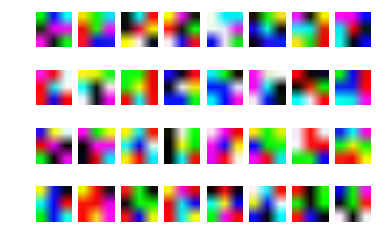

In [123]:
session = tensorflow_backend.get_session();
firstW = model.weights[0].eval(session);
firstW  = numpy.squeeze(firstW);

print("1W shape: ", firstW.shape);

num_weights_1 = num_filters['wc1'];
num_wide_1 = 8;

draw_weights(firstW, num_weights_1, num_wide_1, num_weights_1 / num_wide_1);

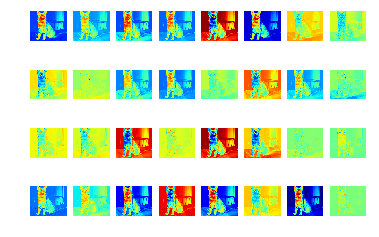

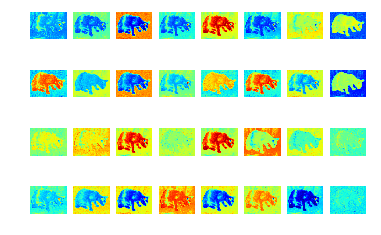

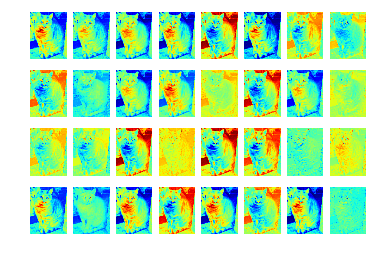

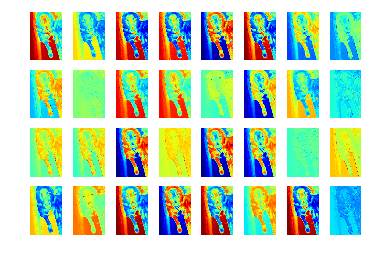

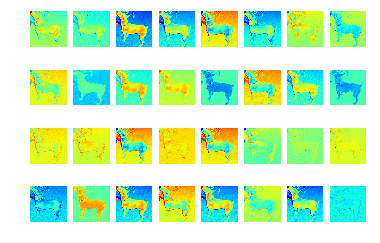

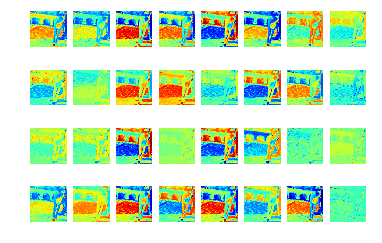

In [134]:
def convolve_image(img_addr):
    img_tes = cv2.imread(img_addr);
    img_tes = img_tes.astype(numpy.float32);
    tes_h = img_tes.shape[0];
    tes_w = img_tes.shape[1];

    img_tes = numpy.reshape(img_tes, [1, tes_h, tes_w, 3])

    ccvv1 = firstW[:,:,:,:];
    ccvv1 = numpy.reshape(ccvv1, [3, 3, 3, 32]);

    applied = tf.nn.conv2d(img_tes, ccvv1, [1, 1, 1, 1], padding='SAME')

    img_app = session.run(applied);

    img_app = img_app[0,:,:,:];
    draw_image(img_app, 32, 8, 4);

convolve_image('../machinelearning/datasets/dogs_vs_cats/test/cats/cat.10000.jpg')
convolve_image('../machinelearning/datasets/dogs_vs_cats/test/cats/cat.10010.jpg')
convolve_image('../machinelearning/datasets/dogs_vs_cats/test/cats/cat.10020.jpg')
convolve_image('../machinelearning/datasets/dogs_vs_cats/test/dogs/dog.10000.jpg')
convolve_image('../machinelearning/datasets/dogs_vs_cats/test/dogs/dog.10010.jpg')
convolve_image('../machinelearning/datasets/dogs_vs_cats/test/dogs/dog.10030.jpg')